In [1]:
import os
import glob
import sys
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib import cm
import numpy as np
from pathlib import Path

from RamanReader import RamanMap 
import RamanFitting as RF

In [2]:
directory = f'/Users/risa/Documents/Research/PentalayerGraphene/RPL_10'   # looks through directory specified in command
	# directory = f'/Users/risa/Scripts/RamanPLPlotting/data'   # looks through directory specified in command
files = Path(directory).glob('*.txt')  # all file names in directory
files = list(files) # convert this to a list so that it's subscriptable


# Testing out peaks for fitting

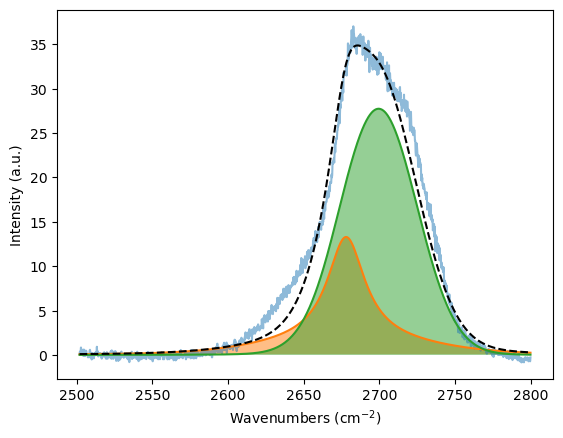

In [8]:
# import data
data = RamanMap(files[0]) 

# remove background
ints, bg = RF.remove_linear_background(data.wn, data.intensity[35], ci=150)

# plot original data
fig, ax = plt.subplots()
ax.plot(data.wn, ints, alpha=0.5)
ax.set_ylabel(r'Intensity (a.u.)')
ax.set_xlabel(r'Wavenumbers ($\mathrm{cm^{-2}}$)')

# testing individual peaks
peak_params = [(13, 2678, 15, 2000, 2678, 50, 0.9),
               (10, 2678, 20, 1900, 2700, 25, 0.1)]

# plotting them
total = np.zeros((len(data.wn),))
for params in peak_params:
    peak = RF.voigt(data.wn, *params) # change the function 
    curve = ax.plot(data.wn, peak)
    c = curve[0].get_color()
    ax.fill_between(data.wn, peak.min(), peak, facecolor=c, alpha=0.5)
    total += peak
ax.plot(data.wn, total, 'k--')


# Testing peak with fit

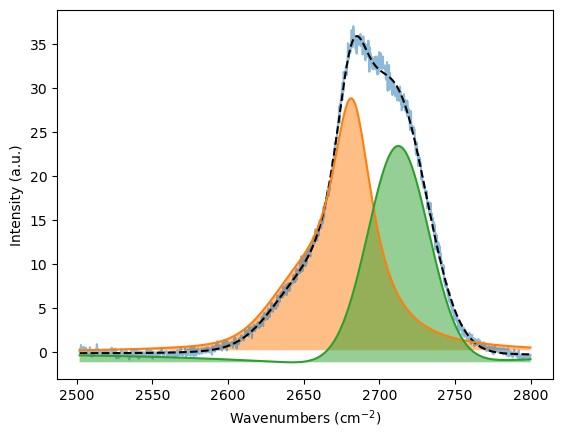

In [9]:
# import data
data = RamanMap(files[0]) 

# remove background
ints, bg = RF.remove_linear_background(data.wn, data.intensity[35], ci=150)

# plot original data
fig, ax = plt.subplots()
ax.plot(data.wn, ints, alpha=0.5)
ax.set_ylabel(r'Intensity (a.u.)')
ax.set_xlabel(r'Wavenumbers ($\mathrm{cm^{-2}}$)')

# perform fit and plot fit
params, rss, peak, fwhm = RF.fit_peaks(data.wn, ints, plot=True, method='voigt', guess = [20, 2700, 15, 2000, 2700, 20, 0.5, 10, 2700, 20, 1000, 2675, 25, 0.5], 
                   guess2=[13, 2678, 15, 2000, 2678, 50, 0.9, 10, 2678, 20, 1900, 2700, 25, 0.1])

# Do a full map

In [3]:
data = RamanMap(files[0])

fwhms = np.zeros((len(data.position),))
peaks = np.zeros((len(data.position),))

# go through each position
for i in range(len(data.intensity)):
    # print(i)
    # remove background
    ints, bg = RF.remove_linear_background(data.wn, data.intensity[i], ci=150)
    # fit the 2D peaks
    params, rss, peak, fwhm = RF.fit_peaks(data.wn, ints, plot=False, method='voigt', guess = [20, 2700, 15, 2000, 2700, 20, 0.5, 10, 2700, 20, 1000, 2675, 25, 0.5], 
                    guess2=[13, 2678, 15, 2000, 2678, 50, 0.9, 10, 2678, 20, 1900, 2700, 25, 0.1])
    fwhms[i] = fwhm
    peaks[i] = peak


Data ranges from nan to nan.


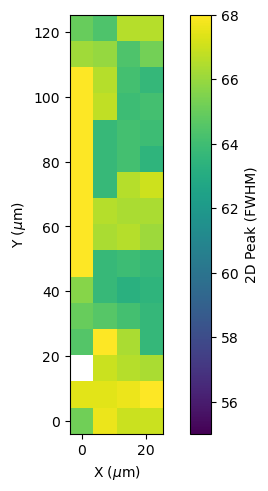

In [4]:
RF.plot_map(fwhms, data.position, cb_label=r'2D Peak (FWHM)', vmin=55, vmax=68, allowed_range=[55, 80])

Data ranges from nan to nan.


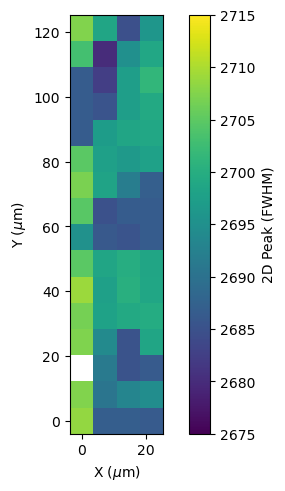

In [11]:
RF.plot_map(peaks, data.position, cb_label=r'2D Peak (FWHM)', vmin=2675, vmax=2715, allowed_range =[2670, 2720])

[59.89 64.3  65.17 62.97 64.28 62.32]
Data ranges from 59.89000000000033 to 65.17000000000007.


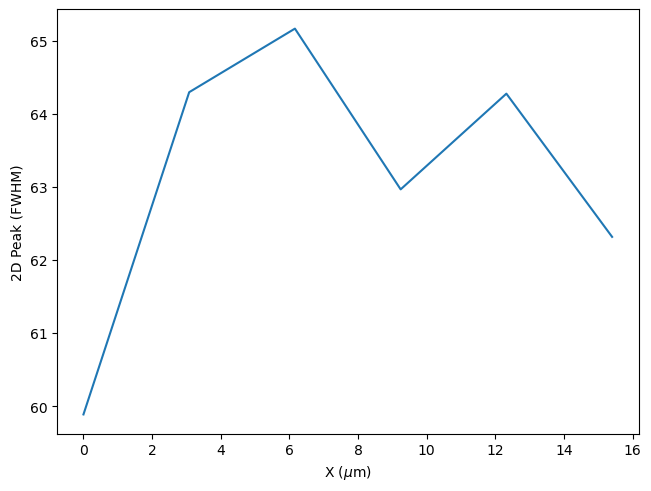

In [4]:
data = RamanMap(files[1])

fwhms = np.zeros((len(data.position),))
peaks = np.zeros((len(data.position),))


# go through each position
for i in range(len(data.intensity)):
    # print(i)
    # remove background
    ints, bg = RF.remove_linear_background(data.wn, data.intensity[i], ci=150)
    # fit the 2D peaks
    params, rss, peak, fwhm = RF.fit_peaks(data.wn, ints, plot=False, method='voigt', guess = [20, 2700, 15, 2000, 2700, 20, 0.5, 10, 2700, 20, 1000, 2675, 25, 0.5], 
                    guess2=[13, 2678, 15, 2000, 2678, 50, 0.9, 10, 2678, 20, 1900, 2700, 25, 0.1])
    fwhms[i] = fwhm
    peaks[i] = peak

print(fwhms)

RF.plot_map(fwhms, data.position, cb_label=r'2D Peak (FWHM)', vmin=55, vmax=68)
